<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%97_5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [ ]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [ ]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


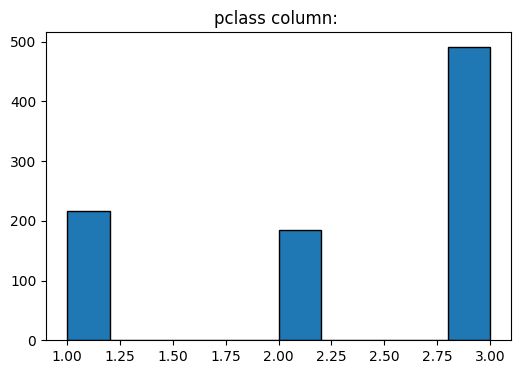

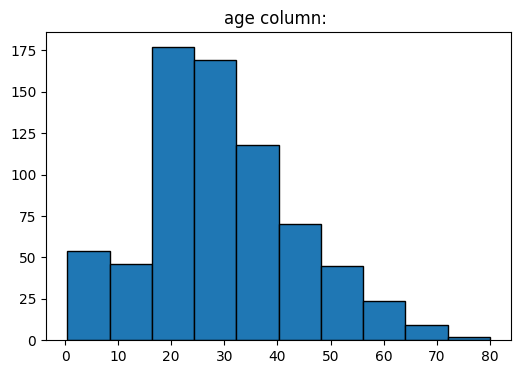

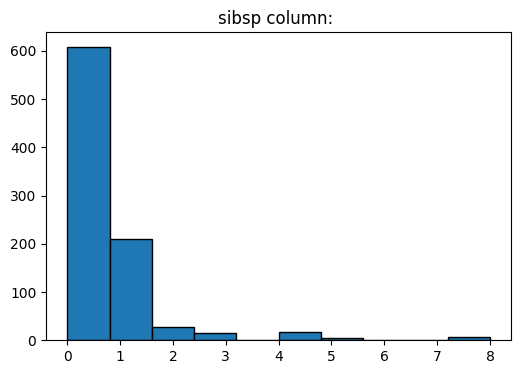

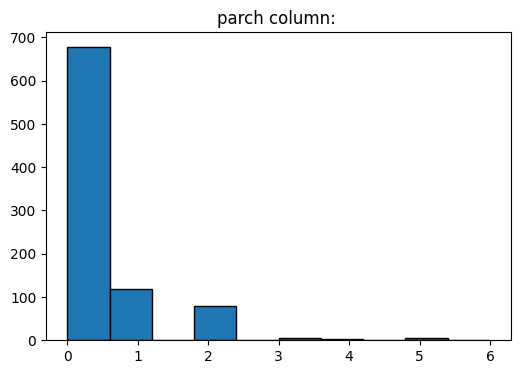

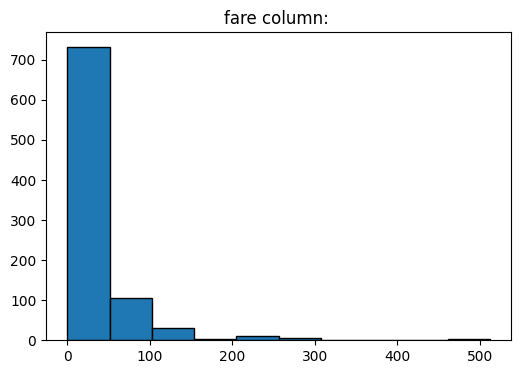

In [ ]:
num_features = ["pclass", "age", "sibsp", "parch", "fare"]
for f in num_features:
  plt.figure(figsize=(6, 4))
  plt.hist(df[f], bins=10, edgecolor='black')
  plt.title(f"{f} column: ")

In [ ]:
df['embarked'] = df['embarked'].astype(str)

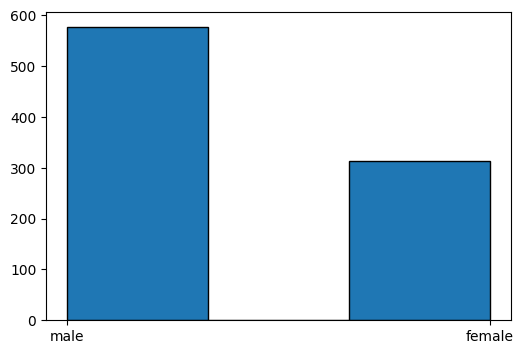

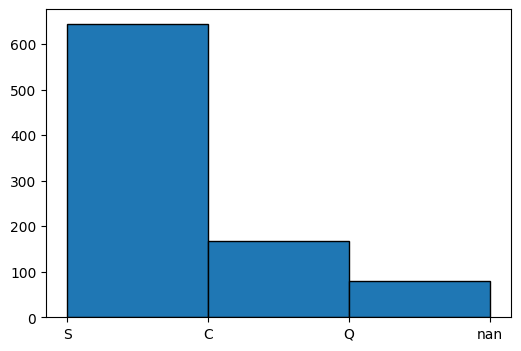

In [ ]:
categ_features = ["sex", "embarked"]
for f in categ_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[f], bins=3, edgecolor='black')

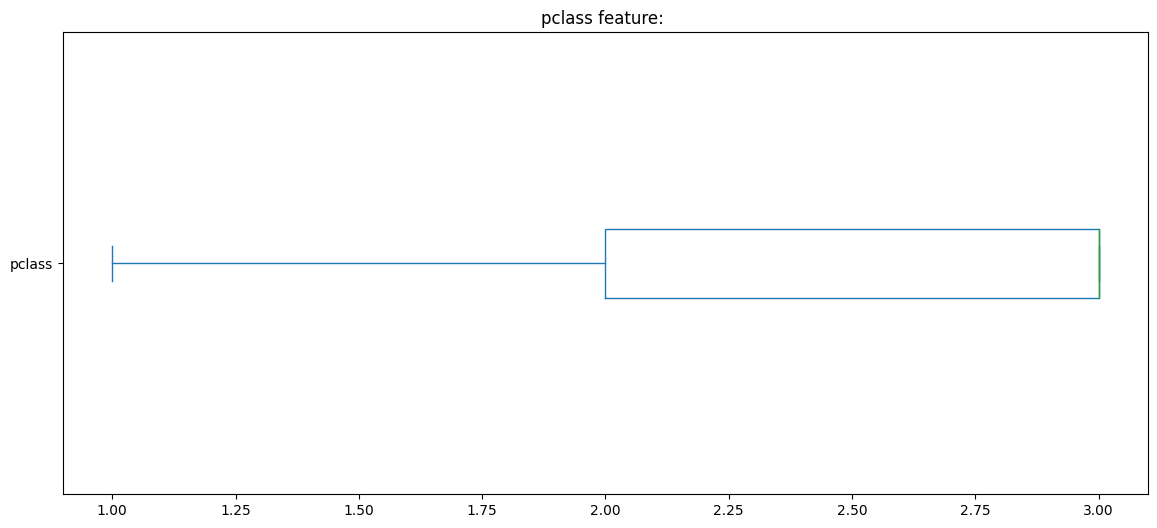

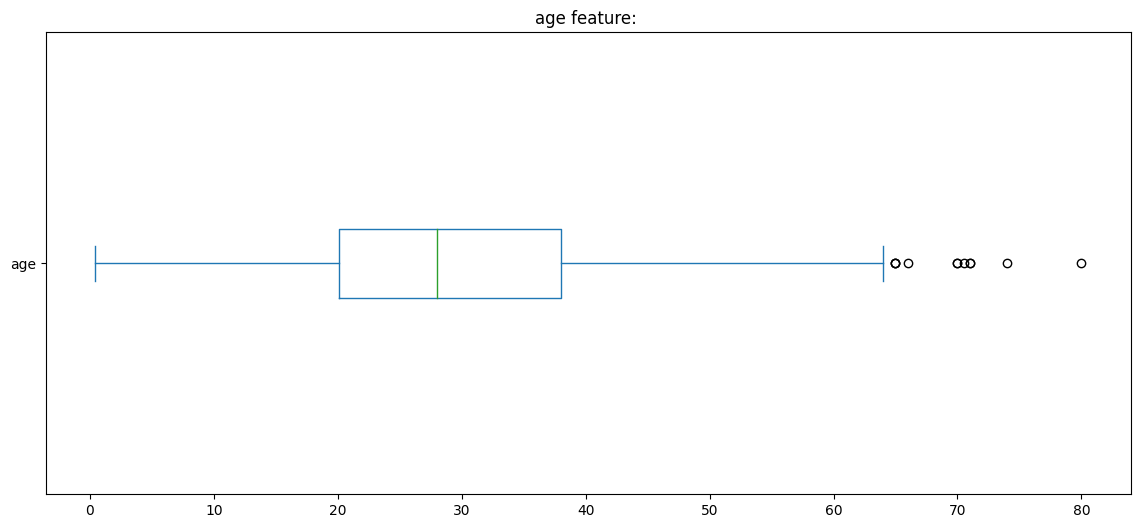

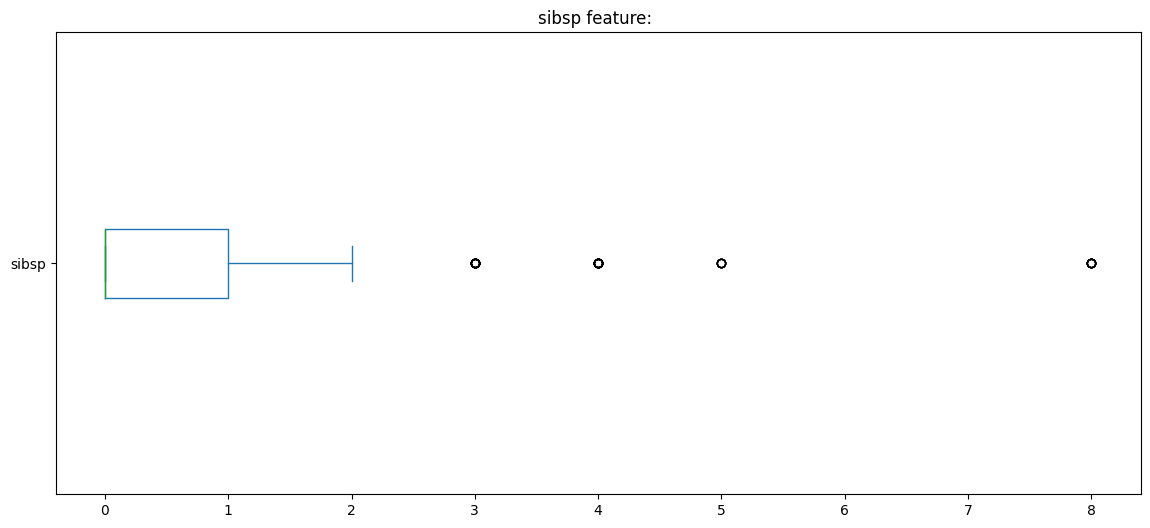

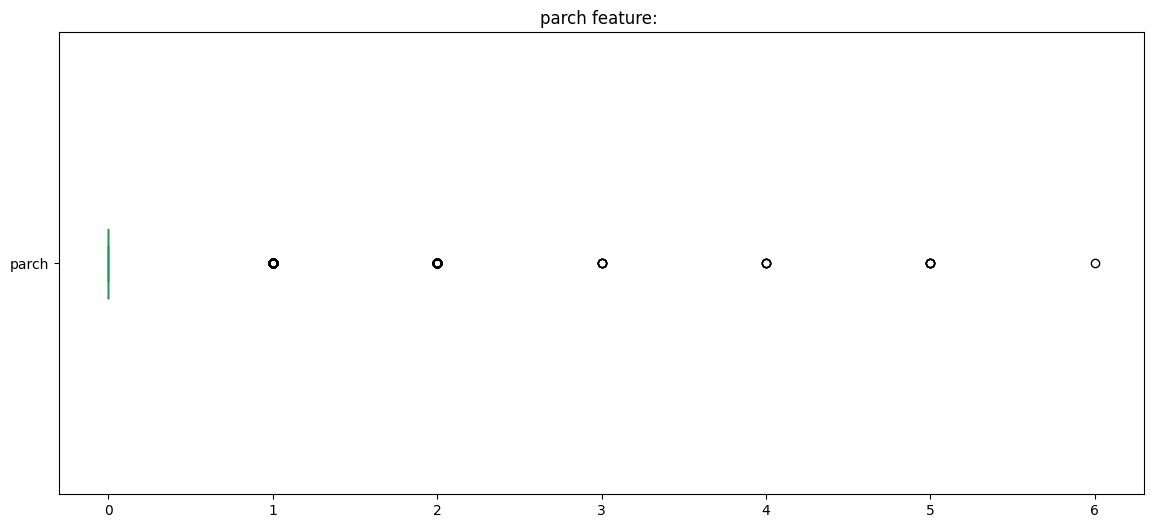

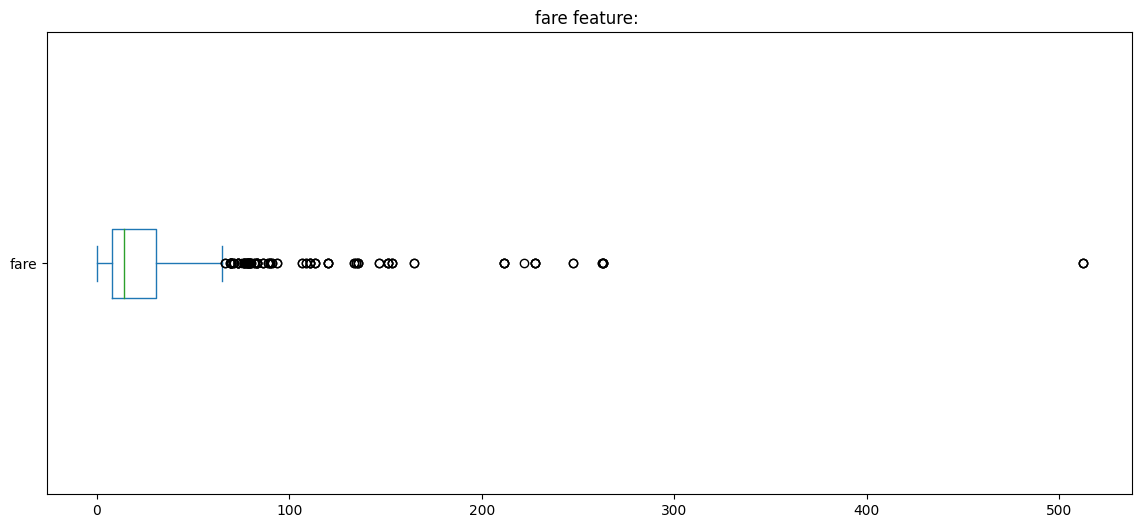

In [ ]:
columns_to_plot = ["pclass", "age", "sibsp", "parch", "fare"]
for i in columns_to_plot:
  df[[i]].plot(kind='box', vert=False, figsize=(14,6))
  plt.title(f"{i} feature: ")

In [ ]:
df_t = df.drop(["sex", "embarked"], axis="columns")
corr = df_t.corr(method='pearson')
corr

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,-0.549500,0.096067,0.159651,0.216225,1.000000


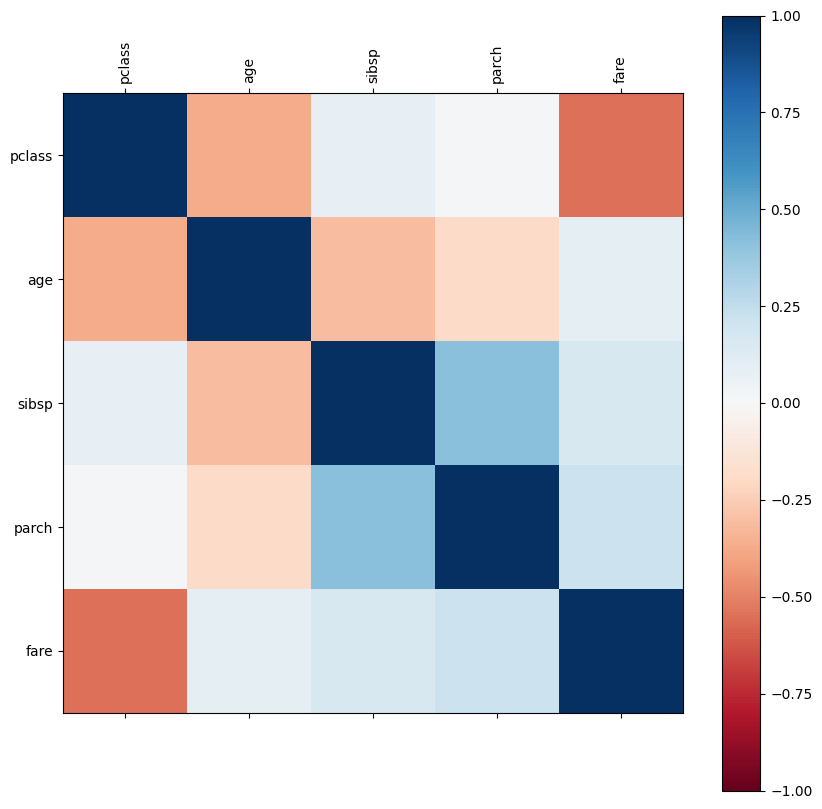

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)


plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

З наведених даних можна зробити висновок, що найбільше між собою корелюють ті
ознаки, що показують наявність серед пар діти/батьки серед пасажирів (parch) та ті, що вказують на наявність братів та сестер (sibsp). Також залежність спостерігається між класом на вартістю квитка. Інші дані корелюють слабше - наприклад вік трохи впливає на клас. Решта даних між собою майже не корелює.

Також варто відмітити, що в датафреймі міститься досить мало даних в категорії parch та fare. Також ці стовпці містять велику кількість викидів.